In [1]:
# Pnadasのversionに起因するwarningsを抑制
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
columns_list = ["Product_Name", "Value"]
index_list = [["A", 300],
              ["B", 500]]

product_list_df = pd.DataFrame(index_list, columns = columns_list)
print(product_list_df)

  Product_Name  Value
0            A    300
1            B    500


In [4]:
WORK_DIR = "data directory" #csvの保存場所
csv_name = "product_list.csv" #csvの保存名
product_list_df.to_csv(WORK_DIR + csv_name, index = False)

In [5]:
read_csv_df = pd.read_csv(WORK_DIR + csv_name)
print(read_csv_df)

  Product_Name  Value
0            A    300
1            B    500


In [6]:
import numpy as np

columns_list_ = ["Review_Date", "Product_Name", "Review_Score"]

date_list = pd.date_range("2019/01/01", periods = 4)
product_name_list = ["A", "B", "C"]
score_list = [3.5, 4.0, 2.0, 2.5, 3.5, 3, 5]
index_list_ = [[date_list[i//5],
                product_name_list[i%3],
                score_list[i%7]]  for i in range(20)]
    
product_review_df = pd.DataFrame(index_list_, columns = columns_list_)
print(product_review_df)

   Review_Date Product_Name  Review_Score
0   2019-01-01            A           3.5
1   2019-01-01            B           4.0
2   2019-01-01            C           2.0
3   2019-01-01            A           2.5
4   2019-01-01            B           3.5
5   2019-01-02            C           3.0
6   2019-01-02            A           5.0
7   2019-01-02            B           3.5
8   2019-01-02            C           4.0
9   2019-01-02            A           2.0
10  2019-01-03            B           2.5
11  2019-01-03            C           3.5
12  2019-01-03            A           3.0
13  2019-01-03            B           5.0
14  2019-01-03            C           3.5
15  2019-01-04            A           4.0
16  2019-01-04            B           2.0
17  2019-01-04            C           2.5
18  2019-01-04            A           3.5
19  2019-01-04            B           3.0


In [7]:
product_C_info_df = pd.DataFrame({"Product_Name": ["C"],"Value": [800]})

product_list_df_ = pd.concat([product_list_df, product_C_info_df],
                             ignore_index = True)
print(product_list_df_)

  Product_Name  Value
0            A    300
1            B    500
2            C    800


In [8]:
review_group_by_product_name = product_review_df.groupby("Product_Name")
review_score_mean = review_group_by_product_name.mean()
print(review_score_mean)

                               Review_Date  Review_Score
Product_Name                                            
A            2019-01-02 10:17:08.571428608      3.357143
B            2019-01-02 13:42:51.428571392      3.357143
C            2019-01-02 12:00:00.000000000      3.083333


In [9]:
product_list_df__ = pd.merge(product_list_df_,
                             review_score_mean,
                             left_on="Product_Name",
                             right_index=True)
print(product_list_df__)

  Product_Name  Value                   Review_Date  Review_Score
0            A    300 2019-01-02 10:17:08.571428608      3.357143
1            B    500 2019-01-02 13:42:51.428571392      3.357143
2            C    800 2019-01-02 12:00:00.000000000      3.083333


In [10]:
product_list_df___ = product_list_df__.rename(columns=
                                              {"Review_Score": "Review_Score_Mean"})
print(product_list_df___)

  Product_Name  Value                   Review_Date  Review_Score_Mean
0            A    300 2019-01-02 10:17:08.571428608           3.357143
1            B    500 2019-01-02 13:42:51.428571392           3.357143
2            C    800 2019-01-02 12:00:00.000000000           3.083333


In [27]:
graph_df = pd.DataFrame(columns = ["Product_Name","Date","Review_Score_Mean"])

for i in range(4):
    ymd = date_list[i]
    calculation = product_review_df[product_review_df.Review_Date <= ymd]
    calculation = calculation.groupby("Product_Name").mean()
    calculation = calculation.assign(Date = ymd)
    calculation = calculation.reset_index()
    calculation = calculation.rename(columns = {"Review_Score": "Review_Score_Mean"})
    graph_df = pd.concat([graph_df, calculation], ignore_index=True, join='inner')
    
print(graph_df)

   Product_Name       Date  Review_Score_Mean
0             A 2019-01-01           3.000000
1             B 2019-01-01           3.750000
2             C 2019-01-01           2.000000
3             A 2019-01-02           3.250000
4             B 2019-01-02           3.666667
5             C 2019-01-02           3.000000
6             A 2019-01-03           3.200000
7             B 2019-01-03           3.700000
8             C 2019-01-03           3.200000
9             A 2019-01-04           3.357143
10            B 2019-01-04           3.357143
11            C 2019-01-04           3.083333


In [28]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Review_Score_Mean'>

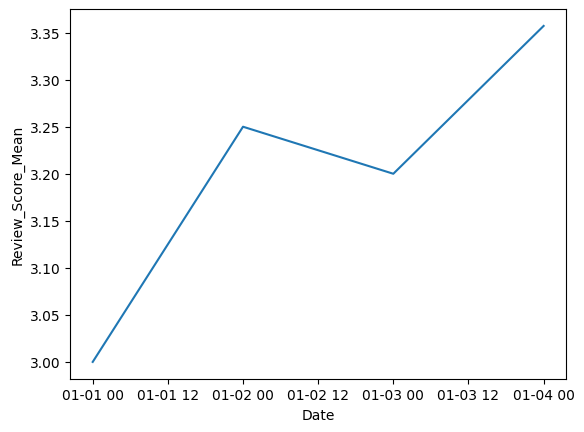

In [29]:
sns.lineplot(x = "Date", y = "Review_Score_Mean",
             data = graph_df[graph_df.Product_Name == "A"])

<Axes: xlabel='Date', ylabel='Review_Score_Mean'>

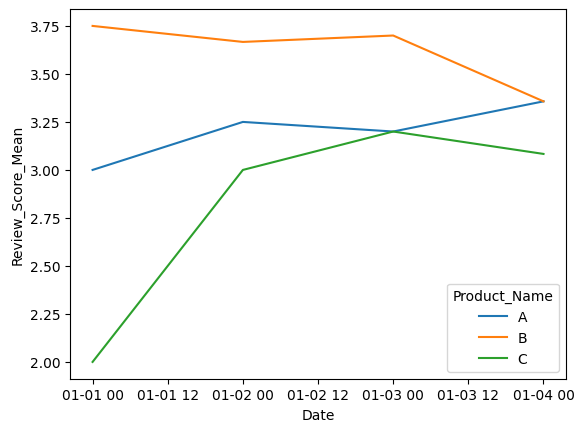

In [30]:
sns.lineplot(x = "Date", y = "Review_Score_Mean", hue = "Product_Name", data = graph_df)

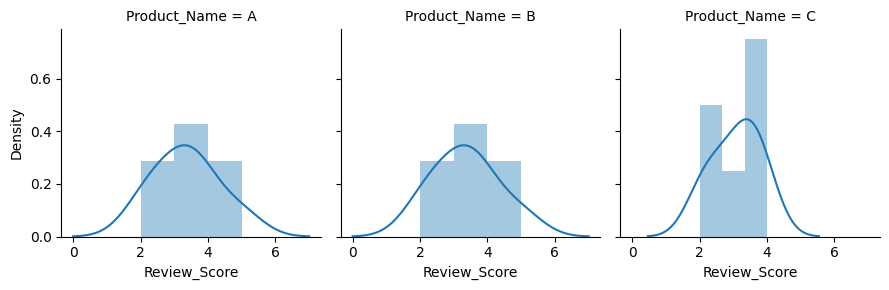

In [31]:
g = sns.FacetGrid(product_review_df[["Product_Name", "Review_Score"]],
                  col = "Product_Name")
g = g.map(sns.distplot, "Review_Score")